In [1]:
import numpy as np
import pickle
import nibabel as nib
import matplotlib.pyplot as plt
import pandas as pd
import os
import itertools
from scipy.io import loadmat

In [2]:
def show_slice(data, N):
    '''
    data: 3d ndarray
    N: number of slice taken at X axis
    '''
    slices = np.round (np.linspace (0, data.shape[0], N, endpoint=False)).astype(np.int16)
    fig, ax = plt.subplots(1, N, figsize=(15, 4), sharey=True)

    for i,s in enumerate(slices):
        ax[i].imshow(data[s], cmap='gray')
        
def show_negative(index, metric):
    for m in metric:
        PATH = './data/current_cycle_117subj_all_metrics/mat/'+m+'_TBI'+'{:03}'.format(index)+'.mat'
        data = loadmat(PATH)
        print(data['vol'].shape)
        show_slice(data['vol'], N=8)

In [3]:
metric = ['ad', 'ak', 'awf', 'eas_De_par', 'eas_De_perp', 'eas_tort', 'FA', 'ias_Da', 'md', 'mk', 'rd', 'rk']
# show_negative(1, metric)

(182, 218, 182)


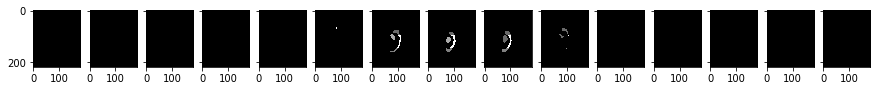

In [4]:
img0 = loadmat('./data/masks/CC_Splenium_mask.mat')['vol']
img1 = loadmat('./data/masks/CC_Genu_mask.mat')['vol']
img2 = loadmat('./data/masks/CC_Body_mask.mat')['vol']
img3 = loadmat('./data/masks/2_R_thal.mat')['vol']
img4 = loadmat('./data/masks/1_L_thal.mat')['vol']

print(img0.shape)

img = img0 + img1*2 + img2*3 + img3*4 + img4*5

show_slice(img, 15)

# 0. View the Masks
* JHU-ICBM-labels-1mm_CortexWM 
* JHU-ICBM-labels-1mm_7ROI
* Bilateral_prefrontalWM

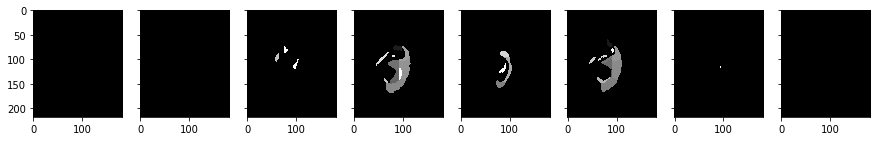

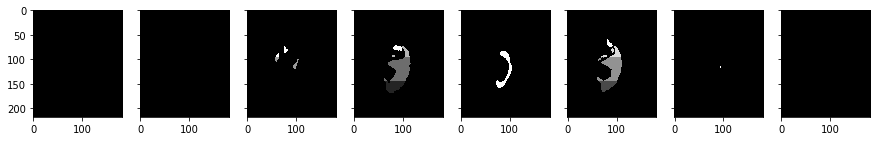

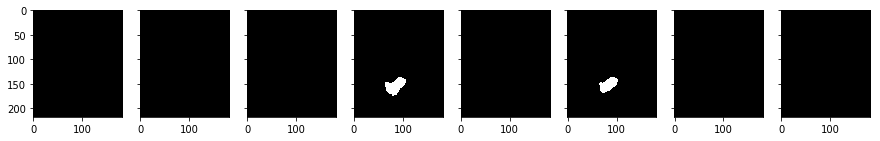

In [3]:
PATH = './data/masks'
APPEND = '.nii'
FNAME = ['JHU-ICBM-labels-1mm_CortexWM', 'JHU-ICBM-labels-1mm_7ROI', 'Bilateral_prefrontalWM']

for f in FNAME:
    data_file = os.path.join(PATH, f + APPEND)
    data = ((nib.load(data_file)).get_fdata()).astype(np.float32)
    data = np.squeeze(data)
    
    N = 8
    slices = np.round (np.linspace (0, data.shape[0], N, endpoint=False)).astype(np.int16)
    fig, ax = plt.subplots(1, N, figsize=(15, 4), sharey=True)
    
    for i,s in enumerate(slices):
        ax[i].imshow(data[s], cmap='gray')

## 1. Generating Statistics for Regions into DataFrame
* For the old data, 7 regions are extracted: L_Thal, R_Thal, CC_Genu, CC_Body, CC_Splenium, L_PrefrontalWM, R_PrefrontalWM
* For the new data, 5 regions are extracted: L_Thal, R_Thal, CC_Genu, CC_Body, CC_Splenium
* FA, AD, AK, AWF, Depar, Deparp, TORT, DA, MD, MK, RD, RK are extracted from original data
* FA, MD, MK, AWF, AK, Depar, Deperp, DA are the metrics
* Save to STA_PATH = './data/stats_data_fix.xlsx'

In [4]:
####################### Setting up the Path and Keys ########################################

OLD_PATH = './data/old_65subj_stats JFR.xlsx'
NEW_PATH = './data/117_Stats_Rep.xlsx'

old_data = pd.read_excel(OLD_PATH, header=0, index_col=0, sheet_name=None)
new_data = pd.read_excel(NEW_PATH, header=0, index_col=0, sheet_name=None)

old_keys = ['all_FA_mean', 'all_FA_std',  # FA
            'all_ad_uthr6_mean', 'all_ad_uthr6_std', # AD
            'all_ak_mean', 'all_ak_std',  # AK
            'all_awf_mean', 'all_awf_std', # AWF
            'all_eas_de_par_uthr6_mean', 'all_eas_de_par_uthr6_std', # DEPAR 
            'all_eas_de_perp_uthr6_mean', 'all_eas_de_perp_uthr6_std',  # DEPERP
            'all_eas_tort_uthr9_mean', 'all_eas_tort_uthr9_std', # TORT
            'all_ias_Da_uthr5_mean', 'all_ias_Da_uthr5_std', # DA
            'all_md_uthr5_mean', 'all_md_uthr5_std', # MD
            'all_mk_uthr5_mean', 'all_mk_uthr5_std', # MK
            'all_rd_uthr5_mean', 'all_rd_uthr5_std', # RD
            'all_rk_uthr5_mean', 'all_rk_uthr5_std' # RK
]

new_keys = ['all_FA_mean', 'all_FA_std', # FA
            'all_ad_uthr6_mean', 'all_ad_uthr6_std', # AD
            'all_ak_mean', 'all_ak_std', # AK
            'all_awf_mean', 'all_awf_std', # AWF
            'all_eas_De_par_mean', 'all_eas_De_par_std', # DEPAR
            'all_eas_De_perp_mean', 'all_eas_De_perp_std', # DEPREP
            'all_tort_mean', 'all_tort_std', # TORT
            'all_Da_mean', 'all_Da_std', # DA
            'all_md_mean', 'all_md_std', # MD
            'all_mk_mean', 'all_mk_std', # MK
            'all_rd_mean', 'all_rd_std', # RD
            'all_rk_mean', 'all_rk_std', # RK
]

mask_keys = ['L_Thal', 'R_Thal', 'CC_Genu', 'CC_Body', 'CC_Splenium']

####################### Rescheduling the columns and row label ##############################

Index_column = ['-'.join(i) for i in list(itertools.product(new_keys, mask_keys))]

data_TBI_index = np.arange(start=1, stop=74)
data_TBN_index = np.arange(start=1, stop=54)

data_TBI_index = np.delete(data_TBI_index, [8,15,16,17,29,33])
data_TBN_index = np.delete(data_TBN_index, [14, 15, 16])

Index_TBI = ['TBI-' + '{:03}'.format(i) for i in data_TBI_index]
Index_TBN = ['TBN-' + '{:03}'.format(i) for i in data_TBN_index]

Index_row = Index_TBI + Index_TBN + list (old_data['all_FA_mean'].index)

data_list = [] # Final Data List

####################### Combining old data with the news ####################################

for okey, nkey in zip(old_keys, new_keys):
    
    old_temp = old_data[okey].iloc[:, 0:5].values
    new_temp = new_data[nkey].values
    
    temp = np.vstack([new_temp, old_temp]) # new on top of old
    data_list.append(temp)

data = np.hstack(data_list)
print('in total {} subjects with {} of features each'.format(*data.shape))

data_dic = pd.DataFrame(data=data, index=Index_row, columns=Index_column)

####################### Save dataframe to Excel #############################################

STA_PATH = './data/stats_data.xlsx'
if not os.path.isfile(STA_PATH):
    data_dic.to_excel(STA_PATH)
else:
    print('file {} exists'.format(STA_PATH))
    
print(data_dic.head())

in total 182 subjects with 120 of features each
file ./data/stats_data.xlsx exists
         all_FA_mean-L_Thal  all_FA_mean-R_Thal  all_FA_mean-CC_Genu  \
TBI-001            0.266784            0.265396             0.523170   
TBI-002            0.240462            0.253854             0.506335   
TBI-003            0.278239            0.290727             0.597240   
TBI-004            0.273632            0.263880             0.563912   
TBI-005            0.283758            0.281879             0.554684   

         all_FA_mean-CC_Body  all_FA_mean-CC_Splenium  all_FA_std-L_Thal  \
TBI-001             0.514349                 0.591073           0.062290   
TBI-002             0.468979                 0.567452           0.053853   
TBI-003             0.542360                 0.641320           0.067453   
TBI-004             0.501947                 0.641861           0.078779   
TBI-005             0.547689                 0.632148           0.066329   

         all_FA_std-R_Thal 

## 2. Combining Data with the Ground Truth
* In total 154 subs have both data and at least one label
* first 120 columns are features, the rest are labels

In [ ]:
####################### Setting up the Path and Keys ########################################

DATA_PATH = './data/stats_data.xlsx'
LABEL_PATH = './data/merged_np.xlsx'

data_df = pd.read_excel(DATA_PATH, index_col=0)
label_df = pd.read_excel(LABEL_PATH,  sheet_name=1, index_col=1)

sub_data = np.array (list (data_df.index))
sub_label = np.array (list (label_df.index))

haveSubject = (sub_data[None,:] == sub_label[:,None]).astype(np.int16)

sub_index = []

####################### Finding the subjects shared by data and label #######################

for i in range (haveSubject.shape[1]):
    if np.sum(haveSubject[:,i]):
        data_idx = i
        label_idx = np.argmax(haveSubject[:,i])
        sub_index.append((data_idx, label_idx))

sub_index_data = [i[0] for i in sub_index]
sub_index_label = [i[1] for i in sub_index]        

data_df = data_df.iloc[sub_index_data, :]
label_df = label_df.iloc[sub_index_label,:]

whole_data = pd.concat([data_df, label_df], axis=1)

####################### Save dataframe to Excel #############################################

WDTA_PATH = './data/stats_data_label.xlsx'

if not os.path.isfile(WDTA_PATH):
    whole_data.to_excel(WDTA_PATH)
else:
    print('file {} exists'.format(WDTA_PATH))
    
print(whole_data.head())

In [ ]:
data_flitered = whole_data [whole_data['T1 Letter Number'].notnull()]
X = data_flitered.values [:,0:120]
Y = data_flitered.values [:,121:122] # T1 Letter Number

In [ ]:
from sklearn.model_selection import train_test_split

Xtr, Xts, Ytr, Yts = train_test_split(X, Y.ravel(), test_size=0.333)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold

regr = Lasso()
cv = KFold(n_splits=5, shuffle=True)
parameters = { 'alpha':np.arange(100)/50}

regr_grid = GridSearchCV(regr, parameters, cv = cv, scoring= 'r2', n_jobs=-1, verbose=10)
regr_grid.fit(X, Y)
print(regr_grid.best_score_)

In [ ]:
model = RandomForestRegressor()

parameters = { 'min_samples_leaf':[1,2,4,8,16],'max_depth':[2,4,8,16],'n_estimators':[500]}
model_grid = GridSearchCV(model, parameters, cv = cv, scoring= 'r2', n_jobs=-1, verbose=10)

model_grid.fit(X, Y)
print(model_grid.best_score_)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

Ypred = regr.predict(Xts)
print(mean_squared_error(Yts, Ypred), r2_score(Yts, Ypred))

In [ ]:
X = data_flitered.values [:,idx_sel]
Y = data_flitered.values [:,121:122] # T1 Letter Number

Xtr, Xts, Ytr, Yts = train_test_split(X, Y.ravel(), test_size=0.333)

In [ ]:

model = RandomForestRegressor()

parameters = { 'min_samples_leaf':[5,10],'max_depth':[10],'n_estimators':[500]}
model_grid = GridSearchCV(model, parameters, cv = 5, scoring= 'r2', n_jobs=-1, verbose=10)

model_grid.fit(X, Y)

In [ ]:
print(model_grid.best_score_)

In [ ]:
regr = RandomForestRegressor(max_depth=10,min_samples_leaf=5, random_state=0, n_estimators=500)
regr.fit(Xtr, Ytr)

Ytrhat = regr.predict(Xtr)
Ypred = regr.predict(Xts)
print(mean_squared_error(Ytr, Ytrhat), r2_score(Ytr, Ytrhat))
print(mean_squared_error(Yts, Ypred), r2_score(Yts, Ypred))

In [ ]:
STA_PATH = './data/stats_data.p'
stat = pickle.load(open(STA_PATH, "rb"))

print(stat.shape)